In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL

from keras import utils                                 # tools for creating one hot encoding
from keras.models import Sequential                     # type of model we wish to use
from keras.layers import Dense, Dropout, Activation     # Types layers we wish to use

from skimage.transform import resize                    # used to scale resize image arrays
from sklearn.metrics import confusion_matrix             # used to quickly make confusion matrix


In [6]:
### settings

# location of the dataset
DATASET_PATH = "/content/dataset"

# desired resolution of images
TARGET_WIDTH = 28
TARGET_HEIGHT = 28

# Invert Image, dark backgrounds sometime can improve accuracy
INVERT = False

# set aside 20% for the validation and 20% for the test
VAL_RATIO = 0.2
TEST_RATIO = 0.2

# inorder to use different validation set following parameter can be changed
random.seed(42)

In [7]:
### load images as numpy arrays

# we want to record a label and assign ground truth label to each number
labels = []
y_all = []  # Lowercase 'y' - 1D vector of the ground labels (n)
X_all = [] # Uppercase 'X' - 3D vecor of all image samples (n x width x height)

# Find the directories in the dataset folder (skip the jupitor notebook checkpoints hidden folder)
for label in os.listdir(DATASET_PATH):
  class_dir = os.path.join(DATASET_PATH, label)
  if os.path.isdir(class_dir) and label != ".ipynb_checkpoints":

    # add the name of the folder to out lables list
    labels.append(label)


    # go through each image in the folder
    for i,file in enumerate(os.listdir(class_dir)):

      # skip the jupitor notebook checkpoints that sometime get added
      if file != ".ipynb_checkpoints":

        # open image and convert to gray scale
        file_path = os.path.join(class_dir, file)
        img = PIL.Image.open(file_path).convert('L')


        # convert the image to numpy array and optionally invert and append to X
        img_array = np.asarray(img)
        if INVERT:
          img_array = 255 - img_array

        X_all.append(img_array)

        # add label to y array
        y_all.append(label)

      # show how many images we loaded
      print("Added", str(i+1), "images from", label)

# calculate total number of samples
num_samples = len(X_all)

# sort the labels list by alphabetical order
labels = sorted(labels)

# printout the labels and numbers of samples
print(labels)
print("Number of samples: ", num_samples)

Added 1 images from diode
Added 2 images from diode
Added 3 images from diode
Added 4 images from diode
Added 5 images from diode
Added 6 images from diode
Added 7 images from diode
Added 8 images from diode
Added 9 images from diode
Added 10 images from diode
Added 11 images from diode
Added 12 images from diode
Added 13 images from diode
Added 14 images from diode
Added 15 images from diode
Added 16 images from diode
Added 17 images from diode
Added 18 images from diode
Added 19 images from diode
Added 20 images from diode
Added 21 images from diode
Added 22 images from diode
Added 23 images from diode
Added 24 images from diode
Added 25 images from diode
Added 26 images from diode
Added 27 images from diode
Added 28 images from diode
Added 29 images from diode
Added 30 images from diode
Added 31 images from diode
Added 32 images from diode
Added 33 images from diode
Added 34 images from diode
Added 35 images from diode
Added 36 images from diode
Added 37 images from diode
Added 38 i

In [8]:
# convert labels to numbers

# show the labels before the conversion
print("before: ", y_all)

# convert each label to its index in the labels
y_out = []
for i, label in enumerate(y_all):
  y_out.append(labels.index(label))
y_all = y_out

# show the labels after the conversion
print("after: ", y_all)

before:  ['diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'diode', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capaci

In [9]:
# shuffle samples and labels and devide into train, test, and validation sets

# shuffle samples and associated labels together
X_y = list(zip(X_all,y_all))
random.shuffle(X_y)
X_all,y_all = zip(*X_y)

print("y_all length" + str(len(y_all)))

# calculate number of validation and test samples to put aside (round down)
num_samples_test = int(TEST_RATIO * num_samples)
num_samples_val = int(VAL_RATIO * num_samples)

# prepare the test set using number of test samples and shuffeled data
X_test = X_all[:num_samples_test]
y_test = y_all[:num_samples_test]

print("y_test length" + str(len(y_test)))

# prepare the validation set using number of validation samples and shuffeled data
X_val = X_all[num_samples_test:(num_samples_test+num_samples_val)]
y_val = y_all[num_samples_test:(num_samples_test+num_samples_val)]

print("y_val length" + str(len(y_val)))

# remaining samples become the training set
X_train = X_all[(num_samples_test+num_samples_val):]
y_train = y_all[(num_samples_test+num_samples_val):]

print("y_train length" + str(len(y_train)))

# Remember the number of samples in the training set
num_samples_train = len(X_train)

# print out the number of test, validation, and training samples
print("number of training samples", num_samples_train)
print("number of test samples", num_samples_test)
print("number of validation samples", num_samples_val)

y_all length250
y_test length50
y_val length50
y_train length150
number of training samples 150
number of test samples 50
number of validation samples 50


y-train length150
labels length5
Label: 3(led)
[[144 149 147 ... 157 157 157]
 [147 149 147 ... 155 157 155]
 [147 149 149 ... 155 155 155]
 ...
 [152 152 152 ... 162 162 162]
 [152 152 152 ... 162 162 162]
 [149 149 152 ... 162 162 162]]


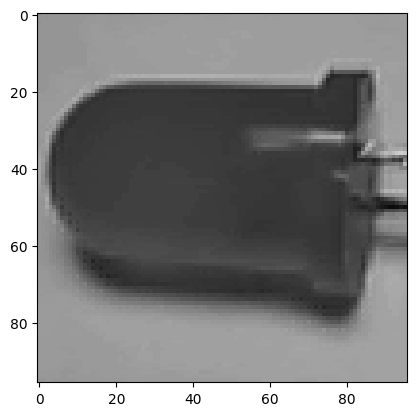

In [10]:
# view one of the training samples

# chose which sample you want to view
idx = 0

print("y-train length" + str(len(y_train)))
print("labels length" + str(len(labels)))

# print (X_train[idx])

# Print out label (number and string) and part of the array
print("Label: "+ str(y_train[idx]) + "(" + labels[y_train[idx]] + ")")
print (X_train[idx])

# Display Image from Array
plt.imshow(X_train[idx], cmap = 'gray', vmin=0, vmax = 255)

In [11]:
### Function to resize list of images
def resize_Images(images, width, height, anti_aliasing=True):
  """
  returns resized and normalised images as we use skimage functionality
  """

  X_out = []
  for i,img in enumerate(images):
    X_out.append(resize(img, (height, width), anti_aliasing=anti_aliasing))
  return X_out

In [12]:
### scale / crop Images

# resize and scale all images in the training set
X_train = resize_Images(X_train, TARGET_WIDTH, TARGET_HEIGHT)

# resize and scale all images in the validation set
X_val = resize_Images(X_val, TARGET_WIDTH, TARGET_HEIGHT)

# resize and scale all images in the test set
X_test = resize_Images(X_test, TARGET_WIDTH, TARGET_HEIGHT)

Label: 3(led)
First Row:  [[0.58127733 0.58412572 0.5843644  0.58849816 0.59774933 0.59532727
  0.59662312 0.59987449 0.60598511 0.60749276 0.6114331  0.61178463
  0.61253644 0.61120944 0.6130039  0.61568781 0.61459803 0.61238659
  0.61411282 0.61568173 0.61568627 0.61568627 0.61568614 0.61522638
  0.60918093 0.6064936  0.60615767 0.61019206]]


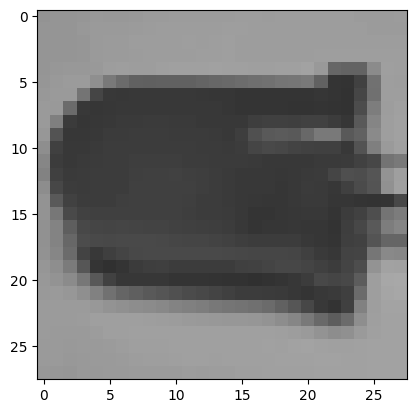

In [13]:
### view training sample again after they have been scaled

# chose which sample you want to use
idx = 0

print("Label: "+str(y_train[idx])+"("+labels[y_train[idx]]+")")
print("First Row: ", X_train[idx][:1,:])

plt.imshow(X_train[idx],cmap = 'gray', vmin=0, vmax=1)


In [14]:
### convert list of samples and labels into numpy arrays

# Training set
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Validation set
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

# test set
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# printout the new numpy array shapes
print("X_train array shape: ",X_train.shape)
print("y_train array shape: ",y_train.shape)

print("X_val array shape: ",X_val.shape)
print("y_val array shape: ",y_val.shape)

print("X_test array shape: ",X_test.shape)
print("y_test array shape: ",y_test.shape)

X_train array shape:  (150, 28, 28)
y_train array shape:  (150,)
X_val array shape:  (50, 28, 28)
y_val array shape:  (50,)
X_test array shape:  (50, 28, 28)
y_test array shape:  (50,)


In [15]:
### Flatten each image to 1D vector

# compute length of 1D array for images
len_vector = TARGET_HEIGHT * TARGET_WIDTH

X_train = X_train.reshape(num_samples_train,len_vector)
X_test = X_test.reshape(num_samples_test, len_vector)
X_val = X_val.reshape(num_samples_val, len_vector)

# determine the input shape for our keras model
input_shape = (X_train.shape[1],)

# printout shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("inputshape: ", input_shape)


X_train shape:  (150, 784)
y_train shape:  (150,)
X_test shape:  (50, 784)
y_test shape:  (50,)
X_val shape: (50, 784)
y_val shape: (50,)
inputshape:  (784,)


In [16]:
### convert labels to one hot encoding

# get number of classes
num_classes = len(labels)

Y_train = utils.to_categorical(y_train, num_classes)
Y_test = utils.to_categorical(y_test, num_classes)
Y_val = utils.to_categorical(y_val, num_classes)

print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)
print("Y_val shape: ", Y_val.shape)

# print few examples of the new matrices
for i in range(10):
  print("Label: "+ str(y_train[i]) + "| one hot Y_train: ", Y_train[i])


Y_train shape:  (150, 5)
Y_test shape:  (50, 5)
Y_val shape:  (50, 5)
Label: 3| one hot Y_train:  [0. 0. 0. 1. 0.]
Label: 3| one hot Y_train:  [0. 0. 0. 1. 0.]
Label: 0| one hot Y_train:  [1. 0. 0. 0. 0.]
Label: 0| one hot Y_train:  [1. 0. 0. 0. 0.]
Label: 0| one hot Y_train:  [1. 0. 0. 0. 0.]
Label: 2| one hot Y_train:  [0. 0. 1. 0. 0.]
Label: 3| one hot Y_train:  [0. 0. 0. 1. 0.]
Label: 4| one hot Y_train:  [0. 0. 0. 0. 1.]
Label: 3| one hot Y_train:  [0. 0. 0. 1. 0.]
Label: 2| one hot Y_train:  [0. 0. 1. 0. 0.]


In [17]:
### construct keras model

# A sequential model is a linear stack of layers
model = Sequential()

# First layer fully connected with relu activation
model.add(Dense(64, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# second layer fully connected with relu activation layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Third layer, one for each class and softmax activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# configure the models traninng settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = 'acc')

# Print out model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3

In [18]:
# train the model
history = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=1, validation_data=(X_val,Y_val))

Epoch 1/200
5/5 [==============================] - 1s 72ms/step - loss: 1.6360 - acc: 0.1867 - val_loss: 1.5596 - val_acc: 0.2800
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 1.6216 - acc: 0.2200 - val_loss: 1.5044 - val_acc: 0.1200
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 1.5463 - acc: 0.3000 - val_loss: 1.4906 - val_acc: 0.2600
Epoch 4/200
5/5 [==============================] - 0s 17ms/step - loss: 1.5593 - acc: 0.2533 - val_loss: 1.4323 - val_acc: 0.5000
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 1.5022 - acc: 0.3267 - val_loss: 1.3538 - val_acc: 0.5800
Epoch 6/200
5/5 [==============================] - 0s 16ms/step - loss: 1.4219 - acc: 0.4733 - val_loss: 1.2813 - val_acc: 0.6200
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 1.3989 - acc: 0.4600 - val_loss: 1.2306 - val_acc: 0.7600
Epoch 8/200
5/5 [==============================] - 0s 13ms/step - loss: 1.3166 - acc: 0.54

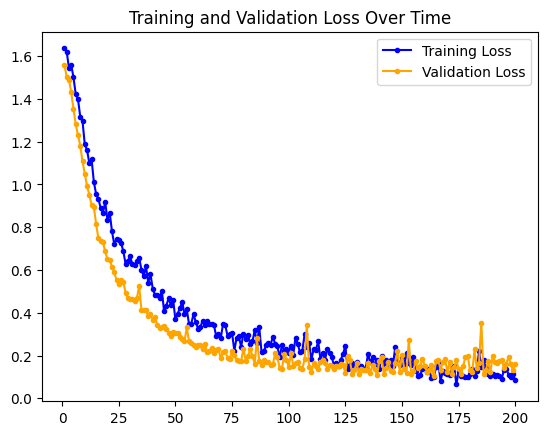

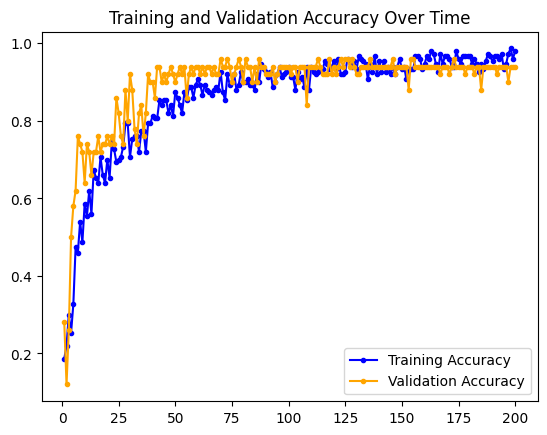

In [21]:
### plot training and validation accuracy and loss over time

# extract accuracy and loss values (in the list form) from the history
acc         = history.history['acc']
val_acc     = history.history['val_acc']
loss        = history.history['loss']
val_loss    = history.history['val_loss']

# create a list of epoch numbers
epochs      = range(1, len(acc)+1)

# Plot training and validation loss over time
plt.figure()
plt.plot(epochs, loss, color='blue', marker='.', label='Training Loss')
plt.plot(epochs, val_loss, color='orange',marker='.', label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()

# Plot training and validation accuracy over time
plt.figure()
plt.plot(epochs, acc, color='blue', marker='.', label= 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'orange', marker= '.', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()

plt.show()

In [22]:
### try predicting label with one validation sample

# Change this to try a different sample from test set
idx = 0

# Make sample 2D array instead of 1D vector (this is what the keras model expects as input)
x = np.expand_dims(X_val[idx], 0)

# Make prediction using trained model
y_pred = model.predict(x)

# Find index of highest score in output
predicted_label = np.argmax(y_pred)
actual_label = np.argmax(Y_val[idx])

# Display model output, predicted label, and actual label
print("Model output: ", y_pred)
print("Predicted Label: ", predicted_label, "-", labels[predicted_label])
print("Actual Label: ",actual_label, "-", labels[actual_label] )



1/1 [==============================] - 0s 190ms/step
Model output:  [[1.3878251e-12 5.2429709e-06 1.0677264e-07 9.9999285e-01 1.7749999e-06]]
Predicted Label:  3 - led
Actual Label:  3 - led


In [23]:
### create confusion matrx from validation set

# Find predictions from all validation samples
Y_pred = model.predict(X_val)
print("Validation Output Shape: ", Y_pred.shape)

# convert actual and predicted validation one-hot encodig to numerical labels
y_val = np.argmax(Y_val, axis=1)
y_pred = np.argmax(Y_pred, axis=1)

# print same samples from actual and validation sets, first 50 samples
print("Actual Validation Labels: \t", y_val[:50])
print("Predicted Validation Labels: \t", y_pred[:50])

# Compute Confusion Matrix (Note: we need to convert to skLearn Matrix to match Edge Impulse)
cm = confusion_matrix(y_val,y_pred)
cm = np.transpose(cm)

# Print Confusion Matrix
print()
print("-----------------> Predicted Labels")
print("|")
print("v Actual Labels")
print("\t\t\t"+ ' '.join("{!s:6}".format('('+str(i)+')') for i in range(num_classes)))
for row in range(num_classes):
  print("{:>12} ({}): [{}]".format(labels[row], row, ' '.join("{!s:6}".format(i) for i in cm[row])))

2/2 [==============================] - 0s 7ms/step
Validation Output Shape:  (50, 5)
Actual Validation Labels: 	 [3 3 4 3 2 1 0 1 0 2 1 3 3 3 0 2 0 2 0 2 4 4 0 3 4 0 2 0 4 1 1 2 4 2 0 0 1
 2 2 4 4 0 2 3 4 1 2 3 0 0]
Predicted Validation Labels: 	 [3 3 4 3 2 1 0 1 0 2 1 3 4 3 0 2 0 2 0 2 4 4 0 3 4 0 2 0 4 1 1 2 4 2 0 0 1
 2 2 2 4 0 2 3 4 1 4 3 0 0]

-----------------> Predicted Labels
|
v Actual Labels
			(0)    (1)    (2)    (3)    (4)   
  background (0): [13     0      0      0      0     ]
   capacitor (1): [0      7      0      0      0     ]
       diode (2): [0      0      11     0      1     ]
         led (3): [0      0      0      8      0     ]
    resistor (4): [0      0      1      1      8     ]


In [27]:
### evaludate model on valuation set
score = model.evaluate(X_val, Y_val)
print("Validation Loss: ", score[0])
print("Validation Accuracy: ", score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.1587 - acc: 0.9400
Validation Loss:  0.15867872536182404
Validation Accuracy:  0.9399999976158142


In [26]:
### evaluate model on test set
score = model.evaluate(X_test, Y_test)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

2/2 [==============================] - 0s 11ms/step - loss: 0.1861 - acc: 0.9400
Test Loss:  0.18606391549110413
Test Accuracy:  0.9399999976158142
